In [2]:
pip install opendatasets

In [3]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/techsash/waste-classification-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saniyamaner786
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data


100%|██████████| 427M/427M [00:00<00:00, 563MB/s]


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


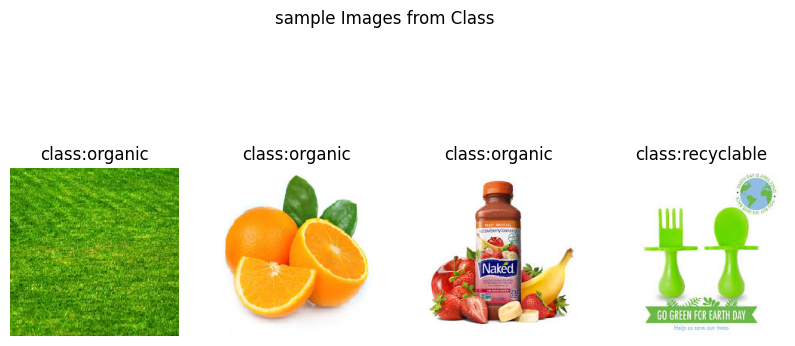

In [5]:
base_dir="/content/waste-classification-data/DATASET"
train_dir=os.path.join(base_dir,"TRAIN")
test_dir=os.path.join(base_dir,"TEST")
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224)
    ,batch_size=32
    ,class_mode="binary"
    )
test_data=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224)
    ,batch_size=32
    ,class_mode="binary"
    )
plt.figure(figsize=(10,5))
for i ,(image,label) in enumerate(train_data):
  if i>=4:
    break
  plt.subplot(1,4,i+1)
  plt.imshow(image[0])
  plt.title("class:"+("organic" if label[0]==0 else "recyclable"))
  plt.axis("off")
plt.suptitle("sample Images from Class")
plt.show()

In [6]:
mobilenet_model=tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights="imagenet")
mobilenet_model.trainable=False
model=tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
histroy=model.fit(
    train_data,
    epochs=10,
    validation_data=test_data)
model.save('moblienet_waste_classifier.h5')
loss,accuracy=model.evaluate(test_data)
print("Test Accuracy:",accuracy)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 102s 107ms/step - accuracy: 0.8693 - loss: 0.2981 - val_accuracy: 0.8774 - val_loss: 0.2762
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.9362 - loss: 0.1716 - val_accuracy: 0.8890 - val_loss: 0.2564
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.9394 - loss: 0.1591 - val_accuracy: 0.8906 - val_loss: 0.2628
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.9464 - loss: 0.1452 - val_accuracy: 0.8758 - val_loss: 0.2914
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.9470 - loss: 0.1447 - val_accuracy: 0.8977 - val_loss: 0.2504
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.9447 - loss: 0.1434 - val_accuracy: 0.8942 - val_loss: 0.2583
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - accuracy: 0.9480 - loss: 0.1367 - val_accuracy: 0.8587 - val_loss: 0.3324
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9492 - loss: 0.1366 - val_accur

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8998 - loss: 0.2542
Test Accuracy: 0.8957421183586121


In [9]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict(test_data).flatten()
y_pred=(y_pred>0.5).astype(int)
y_true=test_data.classes
print("classification_report:\n",classification_report(y_true,y_pred,target_names=['organic','recyclabel']))
conf_matrix=confusion_matrix(y_true,y_pred)
print("confusion_matrix:\n",conf_matrix)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step
classification_report:
               precision    recall  f1-score   support

     organic       0.55      0.62      0.58      1401
  recyclabel       0.44      0.37      0.40      1112

    accuracy                           0.51      2513
   macro avg       0.50      0.50      0.49      2513
weighted avg       0.50      0.51      0.50      2513

confusion_matrix:
 [[867 534]
 [698 414]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


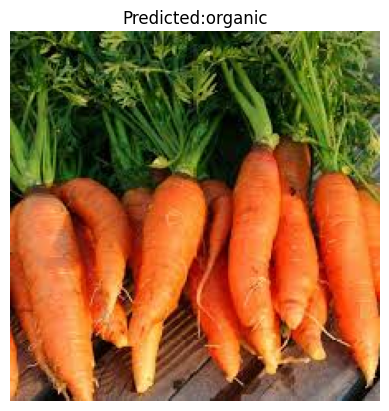

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,img_to_array

model=tf.keras.models.load_model('moblienet_waste_classifier.h5')

# Define target_size as used during training
target_size = (224, 224)

img=load_img('/content/waste-classification-data/DATASET/TEST/O/O_12568.jpg', target_size=target_size)

img_array=np.expand_dims(img_to_array(img)/255.0,axis=0)
pred=model.predict(img_array)[0][0]
label='organic' if pred<0.5 else 'Non Organic'

plt.imshow(img)
plt.title(f'Predicted:{label}')
plt.axis('off')
plt.show()